In [1]:
from pathlib import Path

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.path import Path as mplPath

sns.set_theme(style="ticks", palette="pastel")
# sns.set_style("white")
sns.set_style("whitegrid")
# sns.set_context("poster")
sns.set_context("talk")

In [2]:
data_dir = Path("data")
replicate_name = "trial"

limits = {
    "Wheel Radius": (0.5, 1.5),
    "Chassis Length": (1, 4),
    "Suspension Frequency": (1, 8),
    "Suspension Damping": (0.3, 0.9),
    "Sensor Limit": (1, 15),
    "Speed Max": (0, 10),
    "Speed Slope": (0, 10),
    "Speed Intercept": (-20, 20),
}

objectives = {
    "Final Distance": (0, 17),
    "Final Speed": (0, 10),
    "Hit Wall": (0, 1),
    "Wheel Radius": (0.5, 1.5),
    "Index At Rest": (0, 2008),
}

In [3]:
files = data_dir.glob("*-generations.csv")

partial_dfs = []

for f in files:
    trial = f.stem.split(replicate_name)[1].split("-")[0]
    df_partial = pd.read_csv(f)
    df_partial["Trial"] = trial

    partial_dfs.append(df_partial)

df = pd.concat(partial_dfs, ignore_index=True)
df

,Generation,Worst Feasibility,Average Feasibility,Best Feasibility,Worst Objective,Average Objective,Best Objective,Trial
0,0,-0.709194,-0.121974,0.0,0.000000,0.927463,3.340974,5
1,1,-0.140561,-0.003981,0.0,0.000000,2.110310,3.504202,5
2,2,0.000000,0.000000,0.0,1.842565,2.651699,3.703555,5
3,3,0.000000,0.000000,0.0,-11.205451,2.862869,3.727198,5
4,4,-0.056347,-0.001045,0.0,0.000000,3.009100,3.776842,5
...,...,...,...,...,...,...,...,...
995,95,0.000000,0.000000,0.0,1.536893,3.716345,3.873043,7
996,96,-0.032744,-0.000327,0.0,0.000000,3.591752,3.873043,7
997,97,0.000000,0.000000,0.0,-1.296322,3.613267,3.873043,7
998,98,0.000000,0.000000,0.0,-15.680716,3.410942,3.873043,7


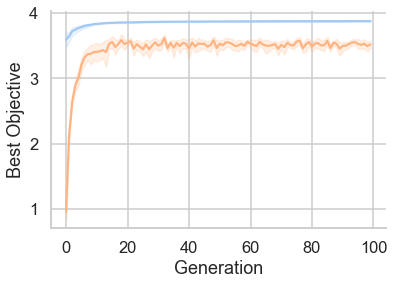

In [4]:
sns.lineplot(x="Generation", y="Best Objective", data=df)
sns.lineplot(x="Generation", y="Average Objective", data=df)
# plt.legend(["Best", "Best-Conf", "Average", "Average-Conf"])
# sns_plot.figure.savefig("generations.png")  # type: ignore
sns.despine()

In [5]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

pio.templates.default = "plotly_white"

In [6]:
def lineplot(fig, df, x, y, title, x_label, y_label):
    i = len(fig.data) // 3
    line_color = px.colors.qualitative.Dark2[i]
    # line_color = "rgb(31, 119, 180)"
    c = px.colors.qualitative.Pastel2[i].split("(")[1].split(")")[0]
    fill_color = f"rgba({c}, 0.3)"
    # fill_color = "rgba(68, 68, 68, 0.3)"

    df_plot = df[[x, y]].groupby([x]).agg(["mean", "std", "count"])
    df_plot = df_plot.droplevel(axis=1, level=0).reset_index()
    df_plot["ci"] = 1.96 * df_plot["std"] / np.sqrt(df_plot["count"])
    df_plot["ci_lower"] = df_plot["mean"] - df_plot["ci"]
    df_plot["ci_upper"] = df_plot["mean"] + df_plot["ci"]

    fig.add_traces(
        [
            go.Scatter(
                name=y,
                x=df_plot[x],
                y=df_plot["mean"],
                mode="lines",
                line=dict(color=line_color),
            ),
            go.Scatter(
                name="95% CI Upper",
                x=df_plot[x],
                y=df_plot["ci_upper"],
                mode="lines",
                marker=dict(color="#444"),
                line=dict(width=0),
                showlegend=False,
            ),
            go.Scatter(
                name="95 CI Lower",
                x=df_plot[x],
                y=df_plot["ci_lower"],
                marker=dict(color="#444"),
                line=dict(width=0),
                mode="lines",
                fillcolor=fill_color,
                fill="tonexty",
                showlegend=False,
            ),
        ]
    )
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        title=title,
        hovermode="x",
    )
    return fig


fig = go.Figure()

lineplot(
    fig,
    df,
    "Generation",
    "Best Objective",
    "Fitness over Generations",
    "Generation",
    "Fitness",
)

lineplot(
    fig,
    df,
    "Generation",
    "Average Objective",
    "Fitness over Generations",
    "Generation",
    "Fitness",
)


fig.show()

In [16]:
files = data_dir.glob("*-population.csv")

partial_dfs = []

for f in files:
    trial = f.stem.split(replicate_name)[1].split("-")[0]
    df_partial = pd.read_csv(f)
    df_partial["Trial"] = trial

    partial_dfs.append(df_partial)

df = pd.concat(partial_dfs, ignore_index=True)
df.columns = [n.replace("_", " ").replace("-", " ").title() for n in df.columns]
df

,Individual,Wheel Radius,Chassis Length,Suspension Frequency,Suspension Damping,Sensor Limit,Speed Max,Speed Slope,Speed Intercept,Wheel Radius Genome,...,Speed Max Genome,Speed Slope Genome,Speed Intercept Genome,Feasibility,Objective,Final Distance,Final Speed,Hit Wall,Index At Rest,Trial
0,0,0.632079,2.354759,3.387221,0.300000,10.487863,9.033205,3.998974,-20.000000,0.132079,...,0.903320,0.399897,0.000000,0.0,3.867982,-0.002491,0.000046,False,790.0,10
1,1,0.661801,2.698314,3.433609,0.300000,8.742624,8.515709,3.998974,-20.000000,0.161801,...,0.851571,0.399897,0.000000,0.0,3.853140,-0.001724,0.000100,False,850.0,10
2,2,0.722228,2.354759,3.649593,0.354451,11.743378,6.824947,3.998974,-20.000000,0.222228,...,0.682495,0.399897,0.000000,0.0,3.845597,-0.001223,-0.000011,False,790.0,10
3,3,0.661801,2.442947,3.724434,0.406484,9.351762,8.855133,3.998974,-20.000000,0.161801,...,0.885513,0.399897,0.000000,0.0,3.856804,-0.002451,0.000088,False,820.0,10
4,4,0.620699,2.354759,3.673540,0.317905,7.341758,9.860959,3.998974,-20.000000,0.120699,...,0.986096,0.399897,0.000000,0.0,3.859645,-0.001955,-0.000057,False,880.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,0.720076,3.959996,5.168789,0.328781,10.977750,7.387673,3.452247,-17.256753,0.220076,...,0.738767,0.345225,0.068581,0.0,3.846127,0.001240,-0.000071,False,790.0,4
996,96,0.720076,3.578705,6.030728,0.409234,10.824834,7.861987,3.452247,-19.160453,0.220076,...,0.786199,0.345225,0.020989,0.0,3.782758,-0.550482,-0.000089,False,780.0,4
997,97,0.725050,3.845033,6.046995,0.548228,7.054866,8.176579,3.452247,-17.246813,0.225050,...,0.817658,0.345225,0.068830,0.0,3.844534,0.004194,-0.000093,False,790.0,4
998,98,0.816886,4.000000,4.797085,0.328781,10.977750,8.143718,3.452247,-17.256753,0.316886,...,0.814372,0.345225,0.068581,0.0,3.319479,0.000795,0.000064,True,810.0,4


In [17]:
df = df.nlargest(int(df.shape[0] * 0.05), "Objective")

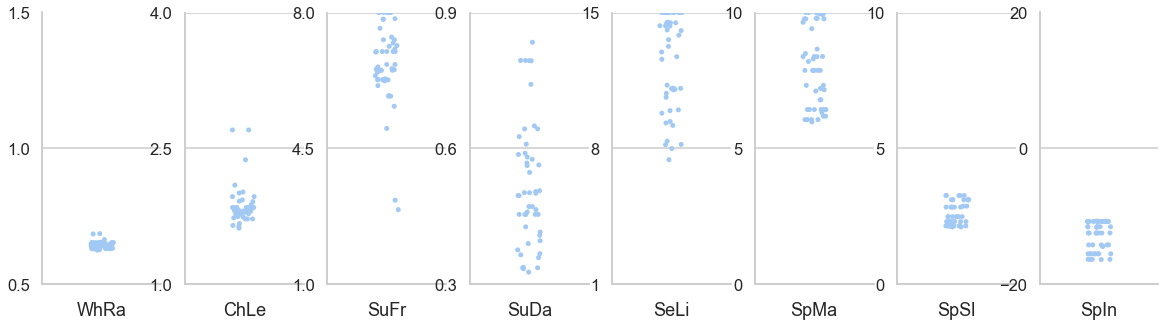

In [18]:
n = len(limits)

fig, axes = plt.subplots(1, n, figsize=(20, 5))

for ax, name in zip(axes, limits.keys()):
    lo, hi = limits[name]
    sns.stripplot(y=name, data=df, ax=ax)
    ax.set_ylabel("")
    ax.set_xlabel("".join(word[:2] for word in name.split(" ")))
    ax.set_ylim(lo, hi)
    ax.set_yticks([lo, (lo + hi) / 2, hi])

sns.despine()

In [19]:
n = len(limits)

figures = [px.strip(df, y=name) for name in limits.keys()]

fig = make_subplots(rows=1, cols=n)

for i, (figure, name) in enumerate(zip(figures, limits.keys())):
    for trace in range(len(figure["data"])):
        fig.add_trace(figure["data"][trace], row=1, col=1 + i)

        lo, hi = limits[name]
        fig.update_yaxes(range=[lo * 0.9, hi * 1.1], row=1, col=1 + i)
        fig.update_yaxes(
            tickmode="array", tickvals=[lo, (lo + hi) / 2, hi], row=1, col=1 + i
        )
        fig.update_xaxes(title_text=name.replace(" ", "<br>"), row=1, col=1 + i)

fig.show()

In [77]:
columns = [f"{name} Genome" for name in limits.keys()]
labels = ["<br>".join(name.split(" ")[:2]) for name in columns]

df_temp = df[columns]
df_temp.columns = labels

fig = px.strip(df_temp)

fig.update_layout(
    title="Evolved Parameters of Top 5% of Population",
    yaxis_showticklabels=False,
    yaxis_title="",
    xaxis_title="",
)

fig.show()

In [97]:
columns = [f"{name} Genome" for name in limits.keys()]
labels = ["<br>".join(name.split(" ")[:2]) for name in columns]

df_temp = df[columns]
df_temp.columns = labels

fig = px.strip(df_temp)

# # fig.add_trace(px.parallel_coordinates(df_temp).data[0])
# fig.add_parcoords(
#     line_color="blue",
#     dimensions=list(
#         [
#             dict(range=[0, 1], values=df_temp[labels[0]], tickvals=[]),
#             dict(range=[0, 1], values=df_temp[labels[1]], tickvals=[]),
#             dict(range=[0, 1], values=df_temp[labels[2]], tickvals=[]),
#             dict(range=[0, 1], values=df_temp[labels[3]], tickvals=[]),
#             dict(range=[0, 1], values=df_temp[labels[4]], tickvals=[]),
#             dict(range=[0, 1], values=df_temp[labels[5]], tickvals=[]),
#             dict(range=[0, 1], values=df_temp[labels[6]], tickvals=[]),
#             dict(range=[0, 1], values=df_temp[labels[7]], tickvals=[]),
#         ]
#     ),
#     domain=dict(x=[0.06, 0.94]),
# )

fig.update_layout(
    title="Evolved Parameters of Top 5% of Population",
    yaxis_showticklabels=False,
    yaxis_title="",
    xaxis_title="",
)

fig.show()

# # fig = px.parallel_coordinates(df, labels=names, template="plotly_white")
# fig = px.parallel_coordinates(df_temp, template="plotly_white")
# fig.update_yaxes(range=[0, 1])
# fig.show()

In [107]:
df_corr = df_temp.corr().round(1)
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.tril_indices_from(mask)] = True
df_corr_viz = df_corr.mask(~mask).dropna(how="all").dropna("columns", how="all")
fig = px.imshow(df_corr_viz, text_auto=True)
fig.show()

/var/folders/rb/yxfb87ys3w7934_vzlq4tfgc0000gp/T/ipykernel_54397/3361696343.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



In [104]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

<Axes: >

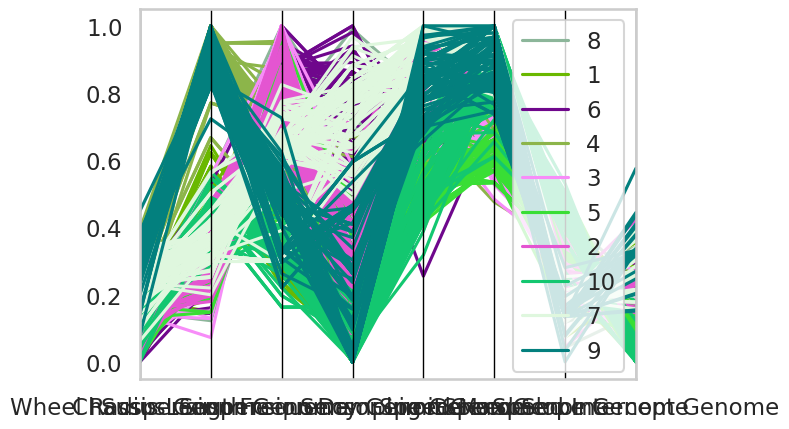

In [121]:
from pandas.plotting import parallel_coordinates

genome_names = [n + " Genome" for n in limits.keys()]
data = [list(df[n].values) for n in genome_names]
data = np.array(data)

df_genomes = df[genome_names + ["Trial"]]
parallel_coordinates(df_genomes, "Trial")

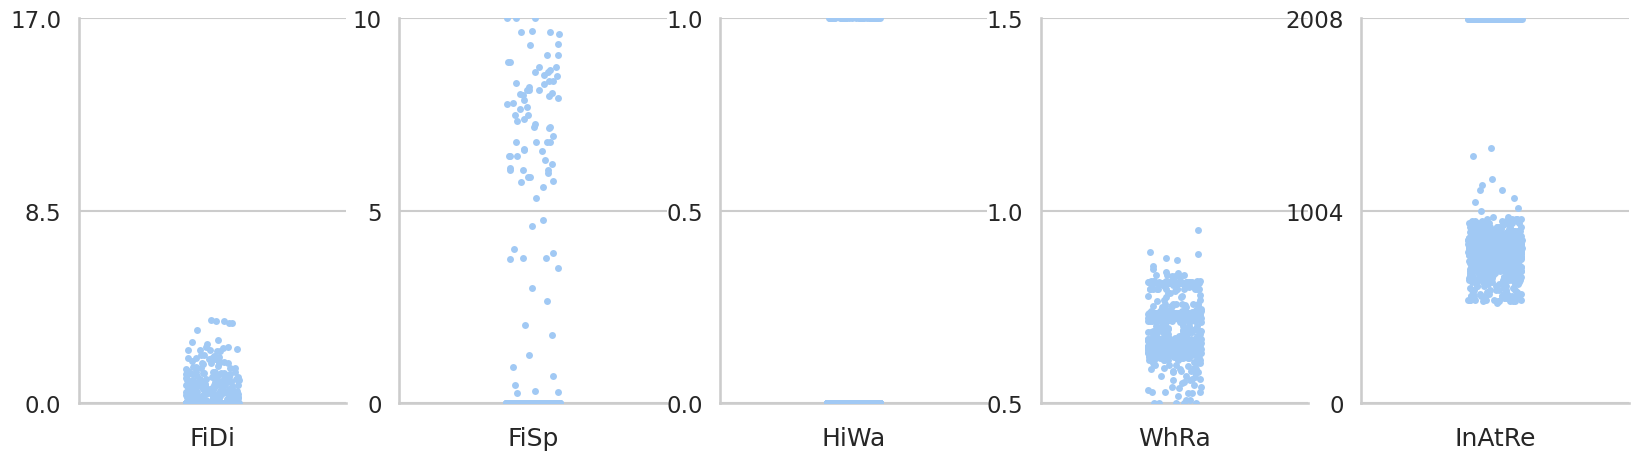

In [122]:
n = len(objectives)

fig, axes = plt.subplots(1, n, figsize=(20, 5))

# df["Index At Rest"] = df["Index At Rest"].astype(int)

for ax, name in zip(axes, objectives.keys()):
    lo, hi = objectives[name]
    sns.stripplot(y=name, data=df, ax=ax)
    ax.set_ylabel("")
    ax.set_xlabel("".join(word[:2] for word in name.split(" ")))
    ax.set_ylim(lo, hi)
    ax.set_yticks([lo, (lo + hi) / 2, hi])

sns.despine()

In [123]:
# parallelCoordinatesPlot(
#     title="title",
#     N=len(df_genomes),
#     data=data,
#     category=df_genomes["cat"].astype("int"),
#     ynames=["".join(w[:2] for w in n.split(" ")[:2]) for n in genome_names],
# )

In [124]:
# def parallelCoordinatesPlot(
#     title, N, data, category, ynames, colors=None, category_names=None
# ):
#     """
#     A legend is added, if category_names is not None.

#     :param title: The title of the plot.
#     :param N: Number of data sets (i.e., lines).
#     :param data: A list containing one array per parallel axis, each containing N data points.
#     :param category: An array containing the category of each data set.
#     :param category_names: Labels of the categories. Must have the same length as set(category).
#     :param ynames: The labels of the parallel axes.
#     :param colors: A colormap to use.
#     :return:
#     """

#     fig, host = plt.subplots()

#     # organize the data
#     ys = np.dstack(data)[0]
#     ymins = ys.min(axis=0)
#     ymaxs = ys.max(axis=0)
#     dys = ymaxs - ymins
#     ymins -= dys * 0.05  # add 5% padding below and above
#     ymaxs += dys * 0.05
#     dys = ymaxs - ymins

#     # transform all data to be compatible with the main axis
#     zs = np.zeros_like(ys)
#     zs[:, 0] = ys[:, 0]
#     zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

#     axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
#     for i, ax in enumerate(axes):
#         # ax.set_ylim(ymins[i], ymaxs[i])
#         ax.set_ylim(0, 1)
#         ax.spines["top"].set_visible(False)
#         ax.spines["bottom"].set_visible(False)
#         if ax != host:
#             ax.spines["left"].set_visible(False)
#             ax.yaxis.set_ticks_position("right")
#             ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

#     host.set_xlim(0, ys.shape[1] - 1)
#     host.set_xticks(range(ys.shape[1]))
#     host.set_xticklabels(ynames, fontsize=14)
#     host.tick_params(axis="x", which="major", pad=7)
#     host.spines["right"].set_visible(False)
#     host.xaxis.tick_top()
#     host.set_title(title, fontsize=18)

#     if colors is None:
#         colors = plt.cm.tab10.colors
#     if category_names is not None:
#         legend_handles = [None for _ in category_names]
#     else:
#         legend_handles = [None for _ in set(category)]
#     for j in range(N):
#         # to just draw straight lines between the axes:
#         # host.plot(range(ys.shape[1]), zs[j,:], c=colors[(category[j] - 1) % len(colors) ])

#         # create bezier curves
#         # for each axis, there will a control vertex at the point itself, one at 1/3rd towards the previous and one
#         #   at one third towards the next axis; the first and last axis have one less control vertex
#         # x-coordinate of the control vertices: at each integer (for the axes) and two inbetween
#         # y-coordinate: repeat every point three times, except the first and last only twice
#         verts = list(
#             zip(
#                 [
#                     x
#                     for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)
#                 ],
#                 np.repeat(zs[j, :], 3)[1:-1],
#             )
#         )
#         # for x,y in verts: host.plot(x, y, 'go') # to show the control points of the beziers
#         codes = [mplPath.MOVETO] + [mplPath.CURVE4 for _ in range(len(verts) - 1)]
#         path = mplPath(verts, codes)
#         patch = patches.PathPatch(
#             path, facecolor="none", lw=1, edgecolor=colors[category[j] - 1]
#         )
#         legend_handles[category[j] - 1] = patch
#         host.add_patch(patch)

#         if category_names is not None:
#             host.legend(
#                 legend_handles,
#                 category_names,
#                 loc="lower center",
#                 bbox_to_anchor=(0.5, -0.18),
#                 ncol=len(category_names),
#                 fancybox=True,
#                 shadow=True,
#             )

#     plt.tight_layout()
#     plt.show()